In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress
import hvplot.pandas

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}&q={city}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        a = json.dumps(city_weather, indent = 4, sort_keys = True)
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng =  city_weather["coord"]["lon"]
        city_max_temp =  city_weather["main"]["temp_max"]
        city_humidity =  city_weather["main"]["humidity"]
        city_clouds =  city_weather["clouds"]["all"]
        city_wind =  city_weather["wind"]["speed"]
        city_country =  city_weather["sys"]["country"]
        city_date =  city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | santa elena de uairen
Processing Record 2 of Set 1 | bashanet
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | longyearbyen
Processing Record 5 of Set 1 | kruisfontein
Processing Record 6 of Set 1 | lata
Processing Record 7 of Set 1 | invercargill
Processing Record 8 of Set 1 | arraial do cabo
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | luwuk
Processing Record 11 of Set 1 | santa cruz
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | sonsorol village
City not found. Skipping...
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | dinan
Processing Record 16 of Set 1 | flin flon
Processing Record 17 of Set 1 | urangan
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | ciudad lazaro cardenas
Processing Record 20 of Set 1 | saudarkrokur
Processing Record 21 of Set 1 |

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

City      Lat      Lng  Max Temp  Humidity  Cloudiness  \
0  santa elena de uairen   4.6167 -61.1333     21.11        91         100   
1               bashanet  -4.2333  35.4167     10.88        98          83   
2         port elizabeth -33.9180  25.5701     17.95        88           0   
3           longyearbyen  78.2186  15.6401      2.91        70          75   
4           kruisfontein -34.0033  24.7314     13.27        62           6   

   Wind Speed Country        Date  
0        1.40      VE  1684975923  
1        2.65      TZ  1684975923  
2        5.66      ZA  1684975701  
3        4.63      SJ  1684975924  
4        2.93      ZA  1684975924

In [5]:
# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

City      Lat      Lng  Max Temp  Humidity  \
City_ID                                                                
0        santa elena de uairen   4.6167 -61.1333     21.11        91   
1                     bashanet  -4.2333  35.4167     10.88        98   
2               port elizabeth -33.9180  25.5701     17.95        88   
3                 longyearbyen  78.2186  15.6401      2.91        70   
4                 kruisfontein -34.0033  24.7314     13.27        62   

         Cloudiness  Wind Speed Country        Date  
City_ID                                              
0               100        1.40      VE  1684975923  
1                83        2.65      TZ  1684975923  
2                 0        5.66      ZA  1684975701  
3                75        4.63      SJ  1684975924  
4                 6        2.93      ZA  1684975924

/Users/shikhasitaula/anaconda3/lib/python3.10/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


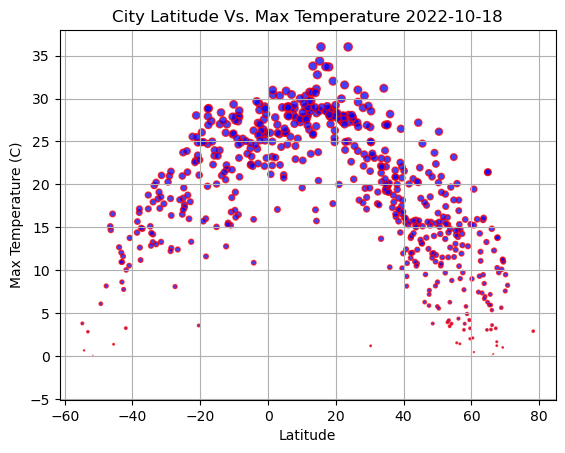

In [8]:
latitude = city_data_df["Lat"]
temperature =  city_data_df["Max Temp"]
plt.scatter(latitude, temperature, marker="o", facecolors="blue", edgecolors="red", s=temperature, alpha=0.75)
plt.xlabel("Latitude")
plt.title("City Latitude Vs. Max Temperature 2022-10-18")
plt.ylabel("Max Temperature (C)")
plt.savefig("output_data/Fig1.png")
plt.grid()
plt.show()            

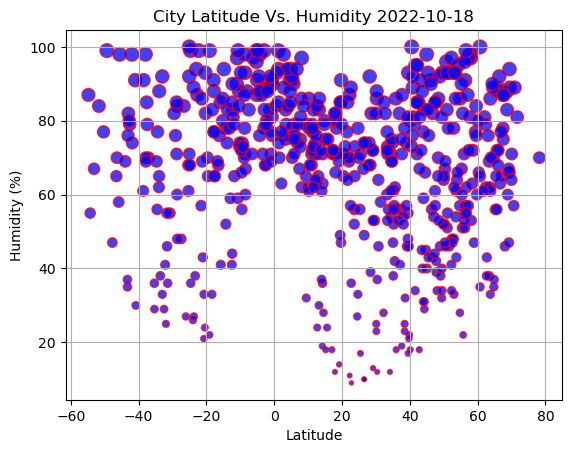

In [9]:
latitude = city_data_df["Lat"]
temperature =  city_data_df["Humidity"]
plt.scatter(latitude, temperature, marker="o", facecolors="blue", edgecolors="red", s=temperature, alpha=0.75)
plt.xlabel("Latitude")
plt.title("City Latitude Vs. Humidity 2022-10-18")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/Fig2.png")
plt.grid()
plt.show() 

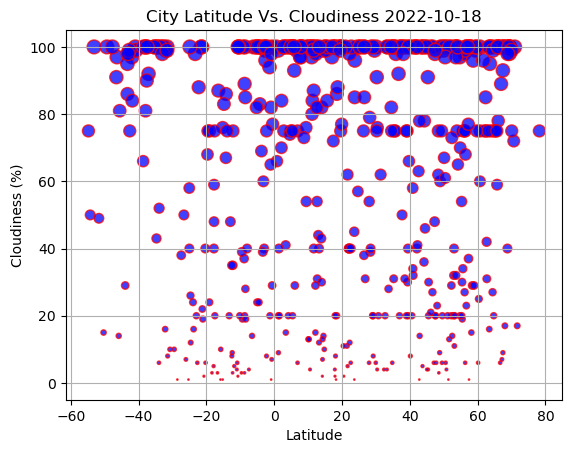

In [10]:
latitude = city_data_df["Lat"]
temperature =  city_data_df["Cloudiness"]
plt.scatter(latitude, temperature, marker="o", facecolors="blue", edgecolors="red", s=temperature, alpha=0.75)
plt.xlabel("Latitude")
plt.title("City Latitude Vs. Cloudiness 2022-10-18")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/Fig3.png")
plt.grid()
plt.show() 

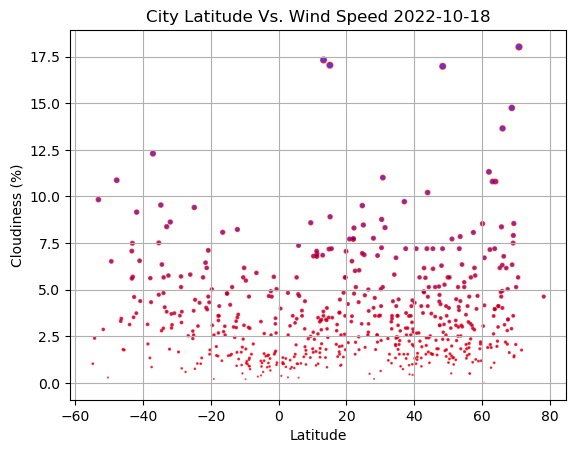

In [11]:
latitude = city_data_df["Lat"]
temperature =  city_data_df["Wind Speed"]
plt.scatter(latitude, temperature, marker="o", facecolors="blue", edgecolors="red", s=temperature, alpha=0.75)
plt.xlabel("Latitude")
plt.title("City Latitude Vs. Wind Speed 2022-10-18")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/Fig4.png")
plt.grid()
plt.show() 

In [12]:
northern_hemi_df = city_data_df[(city_data_df['Lat'] >= 0)]
northern_hemi_df.head()

City      Lat      Lng  Max Temp  Humidity  \
City_ID                                                                
0        santa elena de uairen   4.6167 -61.1333     21.11        91   
3                 longyearbyen  78.2186  15.6401      2.91        70   
5                         lata  40.1629  -8.3327     16.15        80   
8                    jamestown  42.0970 -79.2353     13.77        71   
13                       dinan  48.4167  -2.2500     11.92        86   

         Cloudiness  Wind Speed Country        Date  
City_ID                                              
0               100        1.40      VE  1684975923  
3                75        4.63      SJ  1684975924  
5                 8        1.32      PT  1684975925  
8                40        4.12      US  1684975763  
13                0        2.34      FR  1684975929

In [13]:
southern_hemi_df = city_data_df[(city_data_df['Lat'] <= 0)]
southern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                       
1               bashanet  -4.2333   35.4167     10.88        98          83   
2         port elizabeth -33.9180   25.5701     17.95        88           0   
4           kruisfontein -34.0033   24.7314     13.27        62           6   
6           invercargill -46.4000  168.3500     14.70        70          97   
7        arraial do cabo -22.9661  -42.0278     17.98        94          20   

         Wind Speed Country        Date  
City_ID                                  
1              2.65      TZ  1684975923  
2              5.66      ZA  1684975701  
4              2.93      ZA  1684975924  
6              3.45      NZ  1684975925  
7              1.03      BR  1684975926

In [14]:
def regression_plot(x_series, y_series, x_label, y_label, title, slope_text_position):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_series, y_series)
    regress_values = x_series  * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_series, y_series)
    plt.plot(x_series, regress_values,"r-")
    plt.annotate(line_eq, slope_text_position ,fontsize=15,color="red")
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    print(f"The r-value is: {rvalue}")
    plt.show()

The r-value is: -0.8169690303161673


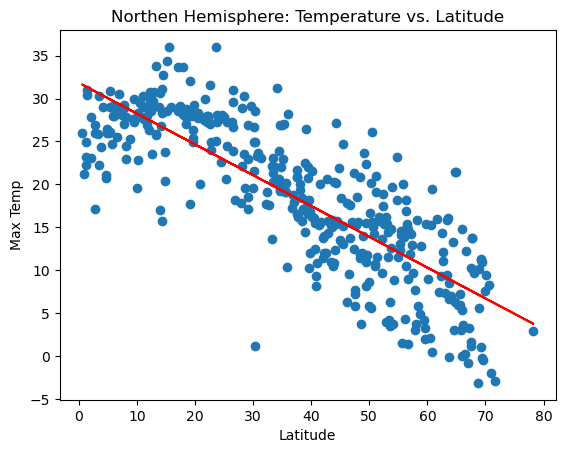

In [15]:
regression_plot(northern_hemi_df["Lat"], 
                northern_hemi_df["Max Temp"], 
                "Latitude",
                "Max Temp",
                "Northen Hemisphere: Temperature vs. Latitude",
                (5,270))

The r-value is: 0.7625102315408253


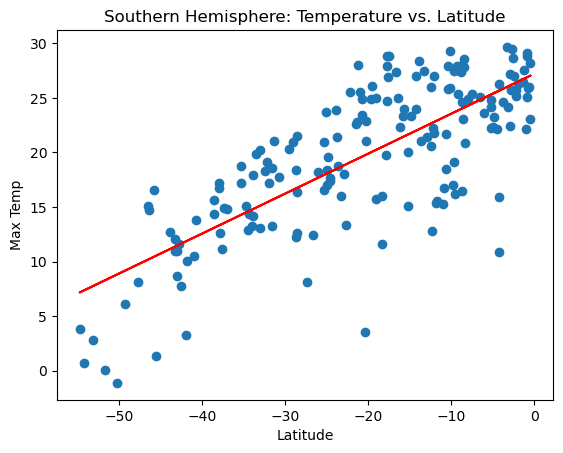

In [16]:
regression_plot(southern_hemi_df["Lat"], 
                southern_hemi_df["Max Temp"], 
                "Latitude",
                "Max Temp",
                "Southern Hemisphere: Temperature vs. Latitude",
                (-48,300))

The r-value is: -0.04866555636032008


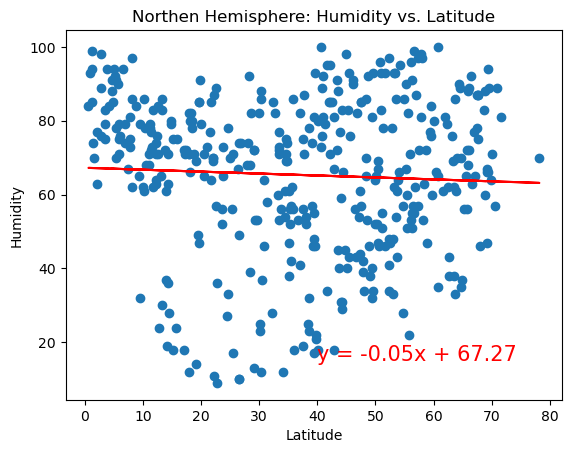

In [17]:
regression_plot(northern_hemi_df["Lat"], 
                northern_hemi_df["Humidity"], 
                "Latitude",
                "Humidity",
                "Northen Hemisphere: Humidity vs. Latitude",
                (40,15))

The r-value is: 0.27048772951840444


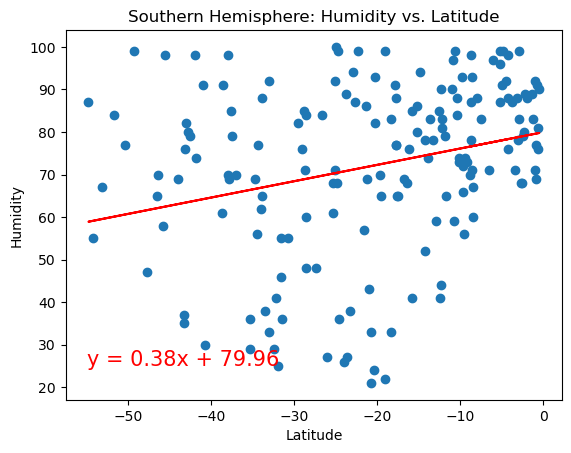

In [18]:
regression_plot(southern_hemi_df["Lat"], 
                southern_hemi_df["Humidity"], 
                "Latitude",
                "Humidity",
                "Southern Hemisphere: Humidity vs. Latitude",
                (-55,25))

The r-value is: -0.022368678222504955


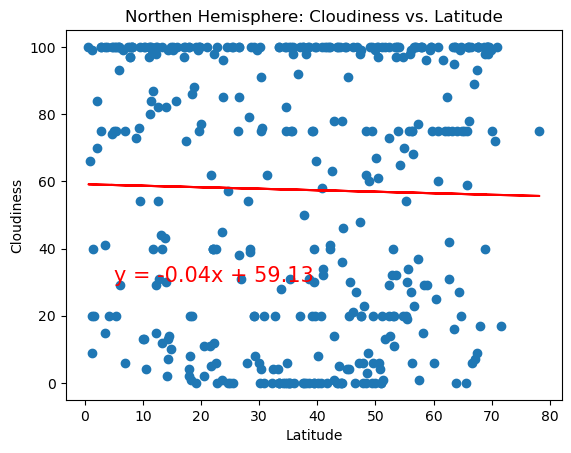

In [19]:
regression_plot(northern_hemi_df["Lat"], 
                northern_hemi_df["Cloudiness"], 
                "Latitude",
                "Cloudiness",
                "Northen Hemisphere: Cloudiness vs. Latitude",
                (5,30))

The r-value is: -0.1643713950606335


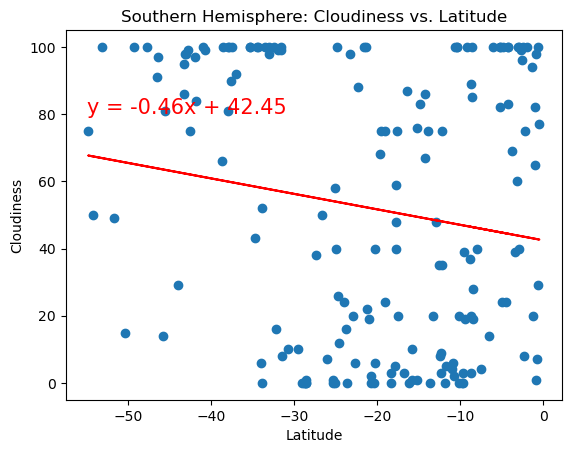

In [20]:
regression_plot(southern_hemi_df["Lat"], 
                southern_hemi_df["Cloudiness"], 
                "Latitude",
                "Cloudiness",
                "Southern Hemisphere: Cloudiness vs. Latitude",
                (-55,80))

The r-value is: 0.1303444439014823


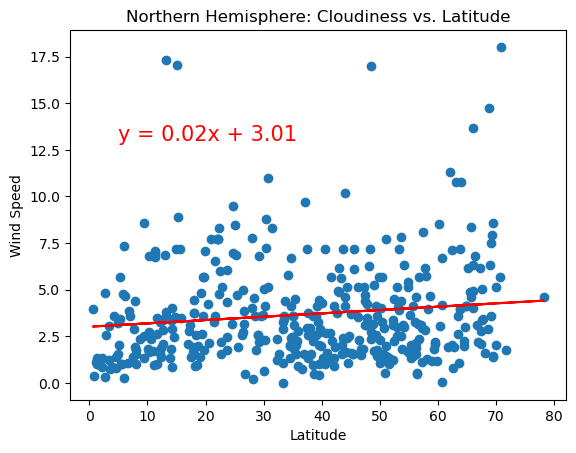

In [21]:
regression_plot(northern_hemi_df["Lat"], 
                northern_hemi_df["Wind Speed"], 
                "Latitude",
                "Wind Speed",
                "Northern Hemisphere: Cloudiness vs. Latitude",
                (5,13))

The r-value is: -0.3710648273453173


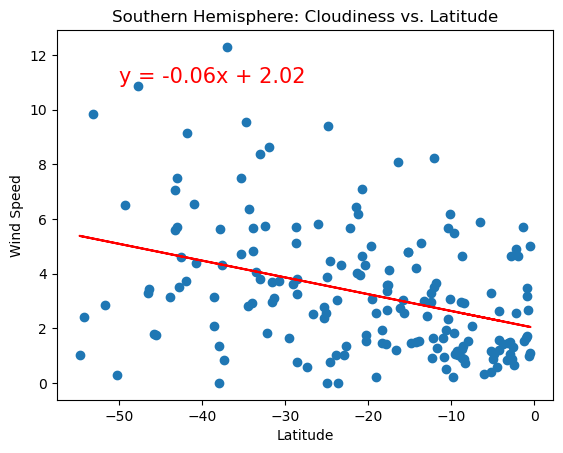

In [22]:
regression_plot(southern_hemi_df["Lat"], 
                southern_hemi_df["Wind Speed"], 
                "Latitude",
                "Wind Speed",
                "Southern Hemisphere: Cloudiness vs. Latitude",
                (-50,11))